<a href="https://colab.research.google.com/github/DhanalakshmiSengottaiyan/DhanalakshmiSengottaiyan/blob/main/Movie_review_analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
imdb, info = tfds.load('imdb_reviews', as_supervised = True, with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7NQKAO/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7NQKAO/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7NQKAO/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
type(imdb)

dict

In [ ]:
imdb.keys()

dict_keys([Split('train'), Split('test'), Split('unsupervised')])

In [ ]:
train_data = imdb['train']
test_data = imdb['test']

print(type(train_data))
print(type(test_data))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
print('Trainig data size : ',len(train_data))
print('Test data size : ',len(test_data))

Trainig data size :  25000
Test data size :  25000


In [ ]:
count = 1
for i in train_data:
  if count > 5:
     break
  print(i)
  count += 1

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on

In [ ]:
count = 1
for review, label in train_data:
  if count > 5:
     break
  print(review)
  print(label)
  print()
  count += 1

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)

tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on 

In [ ]:
count = 1
for review, label in test_data:
  if count > 5:
     break
  print(review)
  print(label)
  print()
  count += 1

tf.Tensor(b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.", shape=(), dtype=string)
tf.Tensor(1, shape=(),

In [ ]:
##coverting tf to strings
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

In [ ]:
for review, label in train_data:
  training_sentences.append(review.numpy().decode('utf8'))
  training_labels.append(label.numpy())

In [ ]:
for review in training_sentences[:5]:
  print(review)
  print()

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.

I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was con

In [ ]:
print(training_labels[:5])

[0, 0, 0, 1, 1]


In [ ]:
for review, label in test_data:
  testing_sentences.append(review.numpy().decode('utf8'))
  testing_labels.append(label.numpy())

In [ ]:
for review in testing_sentences[:5]:
  print(review)
  print()

There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.

A blackly comic tale of a down-trodden priest, Nazarin show

In [ ]:
print(testing_labels[:5])

[1, 1, 0, 0, 1]


In [ ]:
print('Total training review : ',len(training_sentences))
print('Total training labels : ',len(training_labels))
print('Total testing review : ',len(testing_sentences))
print('Total testing labels : ',len(testing_labels))

Total training review :  25000
Total training labels :  25000
Total testing review :  25000
Total testing labels :  25000


In [ ]:
#Tokenization --to built vocabulary and its related number ids; done only for training sets
tokenizer = Tokenizer(oov_token = '#OOV', num_words = 10000)
tokenizer.fit_on_texts(training_sentences)


In [ ]:
#Sequencing
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

In [ ]:
#Padding
padded_training_sequences = pad_sequences(training_sequences, maxlen = 150)
padded_testing_sequences = pad_sequences(testing_sequences, maxlen = 150)

In [ ]:
#converting the labels lists into ndarrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [ ]:
###checking the shape of sequences and labels
print('Training_data_shape : ', padded_training_sequences.shape)
print('Training_labels_shape : ',training_labels.shape)
print('Testing_data_shape : ', padded_testing_sequences.shape)
print('Testing_labels_shape : ', testing_labels.shape)

Training_data_shape :  (25000, 150)
Training_labels_shape :  (25000,)
Testing_data_shape :  (25000, 150)
Testing_labels_shape :  (25000,)


In [ ]:
###Training an LSTM model

from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM

In [ ]:
model = tf.keras.Sequential()
model.add(Embedding(10000, 16, input_length = 150))
model.add(Bidirectional(LSTM(32)))

model.add(Dense(16,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 173601 (678.13 KB)
Trainable params: 173601 (678.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(padded_training_sequences,
                    training_labels,
                    validation_data= (padded_testing_sequences,testing_labels),
                    epochs =10)

Epoch 1/10
782/782 [==============================] - 59s 64ms/step - loss: 0.4188 - accuracy: 0.7974 - val_loss: 0.3636 - val_accuracy: 0.8453
Epoch 2/10
782/782 [==============================] - 20s 26ms/step - loss: 0.2443 - accuracy: 0.9045 - val_loss: 0.3192 - val_accuracy: 0.8654
Epoch 3/10
782/782 [==============================] - 18s 23ms/step - loss: 0.1817 - accuracy: 0.9332 - val_loss: 0.3965 - val_accuracy: 0.8558
Epoch 4/10
782/782 [==============================] - 16s 20ms/step - loss: 0.1361 - accuracy: 0.9513 - val_loss: 0.4001 - val_accuracy: 0.8540
Epoch 5/10
782/782 [==============================] - 16s 20ms/step - loss: 0.1005 - accuracy: 0.9653 - val_loss: 0.4568 - val_accuracy: 0.8485
Epoch 6/10
782/782 [==============================] - 16s 21ms/step - loss: 0.0748 - accuracy: 0.9755 - val_loss: 0.5040 - val_accuracy: 0.8436
Epoch 7/10
782/782 [==============================] - 16s 20ms/step - loss: 0.0585 - accuracy: 0.9811 - val_loss: 0.5781 - val_accuracy:

In [ ]:
type(history.history)

dict

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

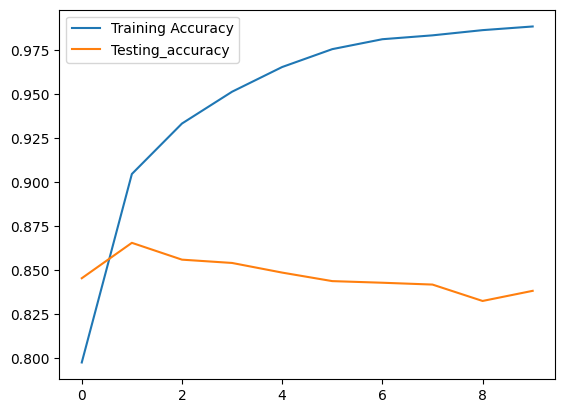

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label = 'Training Accuracy')
plt.plot(val_acc, label = 'Testing_accuracy')
plt.legend()

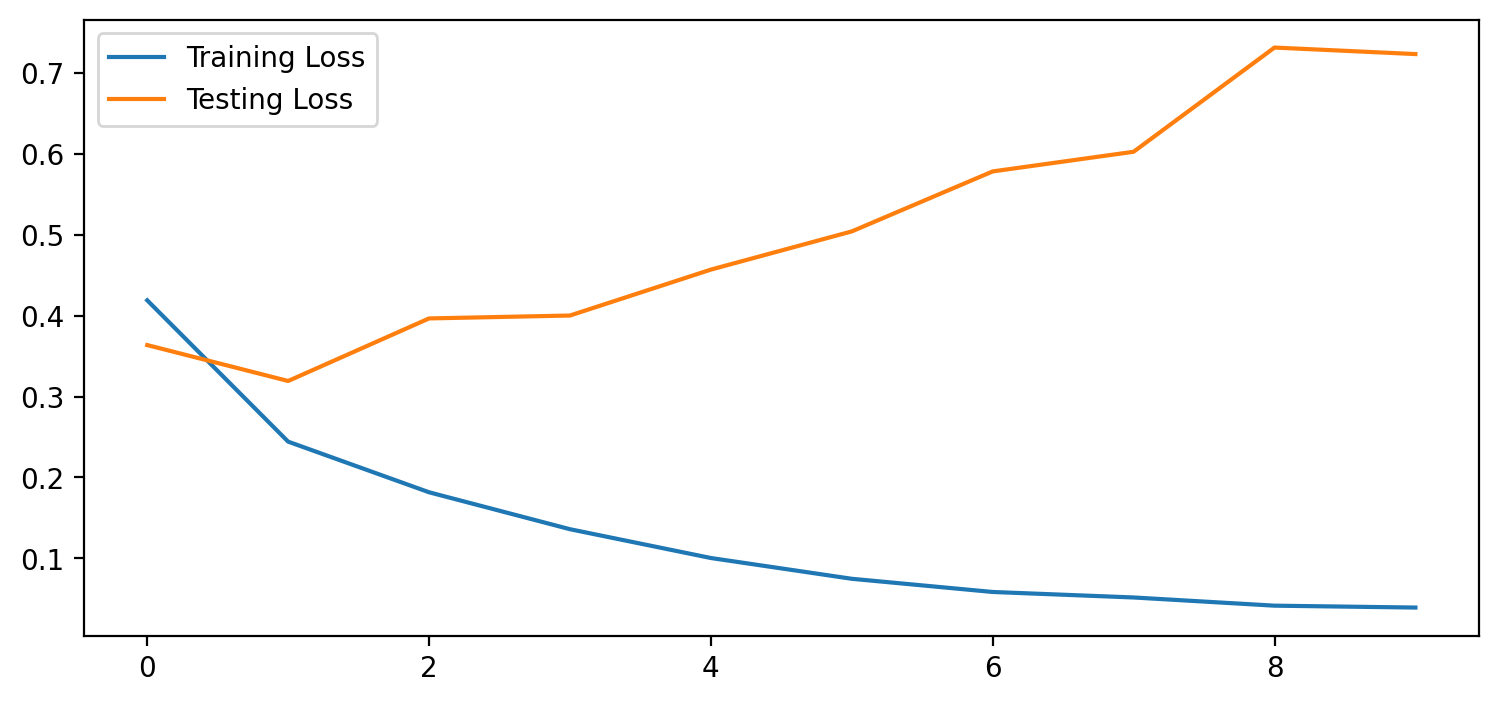

In [ ]:
train_loss = history.history['loss']
val_loss  = history.history['val_loss']

plt.figure(figsize = (9,4), dpi = 200)
plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Testing Loss')
plt.legend()

In [ ]:
model.predict(padded_testing_sequences[0:5])

1/1 [==============================] - 1s 694ms/step


array([[0.9889481 ],
       [0.99104965],
       [0.00125   ],
       [0.00129143],
       [0.99995625]], dtype=float32)

In [ ]:
def predict_sentiment(seq):
  pred = model.predict(seq.reshape(1,-1))[0][0]
  if pred > 0.5:
    print('The review is positive')
  else:
    print('The review is negative')


In [ ]:
seq = padded_testing_sequences[3]
print(seq.shape)
predict_sentiment(seq)

(150,)
1/1 [==============================] - 0s 21ms/step
The review is negative
